In [1113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [546]:
df = pd.read_csv("BRCA.csv")

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [548]:
df = df.dropna()

In [549]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [550]:
df.describe().transpose()

count       mean        std       min       25%        50%  \
Age       317.0  58.725552  12.827374  29.00000  49.00000  58.000000   
Protein1  317.0  -0.027232   0.543858  -2.14460  -0.35060   0.005649   
Protein2  317.0   0.949557   0.906153  -0.97873   0.36884   0.997130   
Protein3  317.0  -0.095104   0.589027  -1.62740  -0.53136  -0.193040   
Protein4  317.0   0.006713   0.625965  -2.02550  -0.38224   0.038522   

               75%      max  
Age       67.00000  90.0000  
Protein1   0.33626   1.5936  
Protein2   1.61200   3.4022  
Protein3   0.25121   2.1934  
Protein4   0.43625   1.6299

In [551]:
df.drop("Patient_ID", axis=1, inplace=True)

In [552]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)

In [553]:
tumorStag = pd.get_dummies(df["Tumour_Stage"], drop_first=True)

In [554]:
df = pd.concat([df, tumorStag], axis=1)

In [555]:
df = df.drop("Tumour_Stage", axis=1)

In [556]:
Histology = pd.get_dummies(df["Histology"], drop_first=True)

In [557]:
df = pd.concat([df, Histology], axis=1)

In [558]:
df = df.drop("Histology", axis=1)

In [559]:
df["ER status"].unique()

array(['Positive'], dtype=object)

In [560]:
df["ER status"] = pd.get_dummies(df["ER status"])

## PR status

In [561]:
df["PR status"].unique()

array(['Positive'], dtype=object)

In [562]:
df["PR status"] = pd.get_dummies(df["PR status"])

In [563]:
df["HER2 status"].unique()

array(['Negative', 'Positive'], dtype=object)

In [564]:
df["HER2 status"] = pd.get_dummies(df["HER2 status"], drop_first=True)

In [565]:
df["Surgery_type"].unique()

array(['Modified Radical Mastectomy', 'Lumpectomy', 'Other',
       'Simple Mastectomy'], dtype=object)

In [566]:
surgetyType = pd.get_dummies(df["Surgery_type"], drop_first=True)

In [567]:
df = pd.concat([df, surgetyType], axis=1)

In [568]:
df = df.drop("Surgery_type", axis=1)

In [569]:
df["Patient_Status"] = pd.get_dummies(df["Patient_Status"], drop_first=True)

In [570]:
df.head()

Age  Gender  Protein1  Protein2  Protein3  Protein4  ER status  PR status  \
0  36.0       0  0.080353   0.42638   0.54715  0.273680          1          1   
1  43.0       0 -0.420320   0.57807   0.61447 -0.031505          1          1   
2  69.0       0  0.213980   1.31140  -0.32747 -0.234260          1          1   
3  56.0       0  0.345090  -0.21147  -0.19304  0.124270          1          1   
4  56.0       0  0.221550   1.90680   0.52045 -0.311990          1          1   

   HER2 status Date_of_Surgery Date_of_Last_Visit  Patient_Status  II  III  \
0            0       15-Jan-17          19-Jun-17               0   0    1   
1            0       26-Apr-17          09-Nov-18               1   1    0   
2            0       08-Sep-17          09-Jun-18               0   0    1   
3            0       25-Jan-17          12-Jul-17               0   1    0   
4            0       06-May-17          27-Jun-19               1   1    0   

   Infiltrating Lobular Carcinoma  Mucinous Carcinoma  \
0                               0                   0   
1                               0                   1   
2                               0                   0   
3                               0                   0   
4                               0                   0   

   Modified Radical Mastectomy  Other  Simple Mastectomy  
0                            1      0                  0  
1                            0      0                  0  
2                            0      1                  0  
3                            1      0                  0  
4                            0      1                  0

In [571]:
df["Date_of_Surgery"] = pd.to_datetime(df["Date_of_Surgery"])

In [572]:
df["Date_of_Last_Visit"] = pd.to_datetime(df["Date_of_Last_Visit"])

In [573]:
df["Month_of_Surgery"] = df["Date_of_Surgery"].apply(lambda x : x.month)

In [574]:
df["Day_of_Surgery"] = df["Date_of_Surgery"].apply(lambda x : x.day)

In [575]:
df["Year_of_Surgery"] = df["Date_of_Surgery"].apply(lambda x : x.year)

In [576]:
df = df.drop("Date_of_Surgery", axis=1)

In [577]:
df["Month_of_Last_visit"] = df["Date_of_Last_Visit"].apply(lambda x : x.month)

In [578]:
df["Day_of_Last_visit"] = df["Date_of_Last_Visit"].apply(lambda x : x.day)

In [579]:
df["Year_of_Last_visit"] = df["Date_of_Last_Visit"].apply(lambda x : x.year)

In [580]:
df = df.drop("Date_of_Last_Visit", axis=1)

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             317 non-null    float64
 1   Gender                          317 non-null    uint8  
 2   Protein1                        317 non-null    float64
 3   Protein2                        317 non-null    float64
 4   Protein3                        317 non-null    float64
 5   Protein4                        317 non-null    float64
 6   ER status                       317 non-null    uint8  
 7   PR status                       317 non-null    uint8  
 8   HER2 status                     317 non-null    uint8  
 9   Patient_Status                  317 non-null    uint8  
 10  II                              317 non-null    uint8  
 11  III                             317 non-null    uint8  
 12  Infiltrating Lobular Carcinoma  317 

In [582]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'ER status', 'PR status', 'HER2 status', 'Patient_Status', 'II', 'III',
       'Infiltrating Lobular Carcinoma', 'Mucinous Carcinoma',
       'Modified Radical Mastectomy', 'Other', 'Simple Mastectomy',
       'Month_of_Surgery', 'Day_of_Surgery', 'Year_of_Surgery',
       'Month_of_Last_visit', 'Day_of_Last_visit', 'Year_of_Last_visit'],
      dtype='object')

In [583]:
target = "Patient_Status"

<AxesSubplot:xlabel='Patient_Status', ylabel='count'>

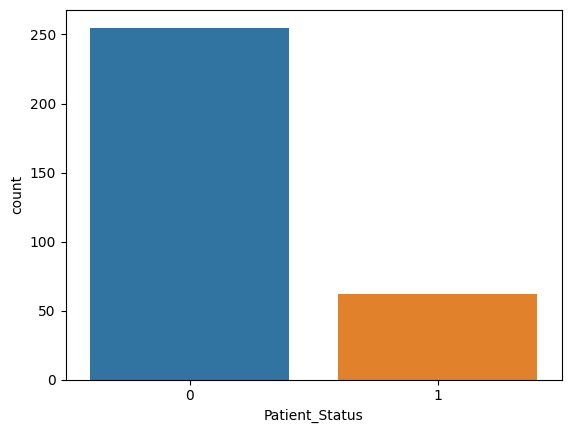

In [584]:
sns.countplot(x = df["Patient_Status"])

In [585]:
df.isnull().sum()

Age                               0
Gender                            0
Protein1                          0
Protein2                          0
Protein3                          0
Protein4                          0
ER status                         0
PR status                         0
HER2 status                       0
Patient_Status                    0
II                                0
III                               0
Infiltrating Lobular Carcinoma    0
Mucinous Carcinoma                0
Modified Radical Mastectomy       0
Other                             0
Simple Mastectomy                 0
Month_of_Surgery                  0
Day_of_Surgery                    0
Year_of_Surgery                   0
Month_of_Last_visit               0
Day_of_Last_visit                 0
Year_of_Last_visit                0
dtype: int64

<AxesSubplot:>

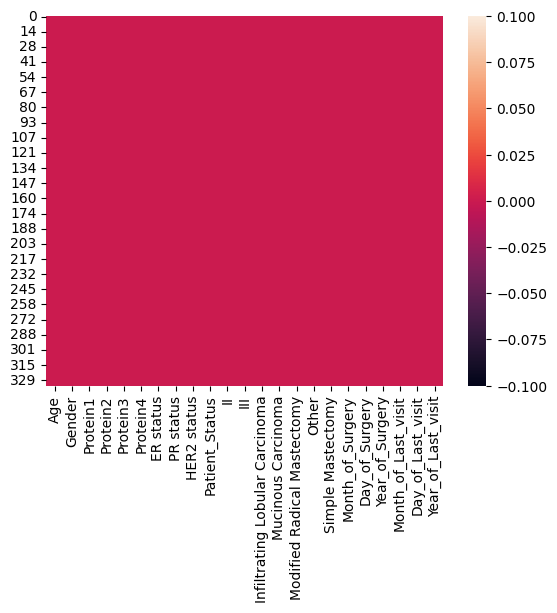

In [586]:
sns.heatmap(df.isnull())

## Drpping Consideration 
- For Er Status
- PR status
- These have 0 varience and will have no effect on Model prediction, constant


In [587]:
df.corrwith(df[target]).sort_values()

Day_of_Last_visit                -0.130118
Month_of_Last_visit              -0.070580
HER2 status                      -0.046123
Infiltrating Lobular Carcinoma   -0.033593
Month_of_Surgery                 -0.024285
Protein1                         -0.019805
Simple Mastectomy                -0.014044
Age                              -0.012410
Year_of_Surgery                  -0.008437
Modified Radical Mastectomy      -0.007202
II                                0.012763
Gender                            0.015509
Protein3                          0.025305
Mucinous Carcinoma                0.027212
III                               0.035980
Year_of_Last_visit                0.038366
Day_of_Surgery                    0.062013
Protein2                          0.074810
Protein4                          0.074876
Other                             0.086781
Patient_Status                    1.000000
ER status                              NaN
PR status                              NaN
dtype: floa

In [733]:
df[target].unique()

array([0, 1], dtype=uint8)

In [844]:
from sklearn.model_selection import train_test_split

In [845]:
X = df.drop(target, axis=1).values
y = df[target].values

In [846]:
xsm, ysm = SMOTE().fit_resample(X, y)

In [847]:
X_train, X_test, y_train, y_test = train_test_split(xsm, ysm, test_size=0.20, random_state=42)

In [848]:
scalar = MinMaxScaler()

In [849]:
X_train = scalar.fit_transform(X_train)

In [850]:
X_test = scalar.transform(X_test)

In [851]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, Dropout

In [852]:
from tensorflow.keras.callbacks import EarlyStopping

In [853]:
model = Sequential()
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=12, activation="relu"))
model.add(Dense(units=20, activation="relu"))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [854]:
stop = EarlyStopping(patience=100)

In [855]:
model.fit(X_train, y_train, epochs =400, validation_data = (X_test, y_test), callbacks = [stop])

Train on 408 samples, validate on 102 samples
Epoch 1/400
408/408 [==============================] - 1s 2ms/sample - loss: 0.6933 - accuracy: 0.5147 - val_loss: 0.6939 - val_accuracy: 0.4706
Epoch 2/400
408/408 [==============================] - 0s 145us/sample - loss: 0.6954 - accuracy: 0.4755 - val_loss: 0.6931 - val_accuracy: 0.4902
Epoch 3/400
408/408 [==============================] - 0s 146us/sample - loss: 0.6922 - accuracy: 0.5221 - val_loss: 0.6933 - val_accuracy: 0.4804
Epoch 4/400
408/408 [==============================] - 0s 141us/sample - loss: 0.6921 - accuracy: 0.5098 - val_loss: 0.6933 - val_accuracy: 0.4804
Epoch 5/400
408/408 [==============================] - 0s 143us/sample - loss: 0.6910 - accuracy: 0.5123 - val_loss: 0.6931 - val_accuracy: 0.5784
Epoch 6/400
408/408 [==============================] - 0s 148us/sample - loss: 0.6923 - accuracy: 0.5270 - val_loss: 0.6928 - val_accuracy: 0.5980
Epoch 7/400
408/408 [==============================] - 0s 149us/sample - l

408/408 [==============================] - 0s 147us/sample - loss: 0.5665 - accuracy: 0.7108 - val_loss: 0.5176 - val_accuracy: 0.7647
Epoch 57/400
408/408 [==============================] - 0s 146us/sample - loss: 0.5576 - accuracy: 0.7010 - val_loss: 0.5082 - val_accuracy: 0.7843
Epoch 58/400
408/408 [==============================] - 0s 144us/sample - loss: 0.5050 - accuracy: 0.7745 - val_loss: 0.4917 - val_accuracy: 0.7745
Epoch 59/400
408/408 [==============================] - 0s 137us/sample - loss: 0.5383 - accuracy: 0.7255 - val_loss: 0.4840 - val_accuracy: 0.7843
Epoch 60/400
408/408 [==============================] - 0s 142us/sample - loss: 0.5469 - accuracy: 0.7255 - val_loss: 0.4900 - val_accuracy: 0.7647
Epoch 61/400
408/408 [==============================] - 0s 141us/sample - loss: 0.5185 - accuracy: 0.7745 - val_loss: 0.4990 - val_accuracy: 0.7647
Epoch 62/400
408/408 [==============================] - 0s 140us/sample - loss: 0.5223 - accuracy: 0.7647 - val_loss: 0.5019 

408/408 [==============================] - 0s 140us/sample - loss: 0.4142 - accuracy: 0.8088 - val_loss: 0.4186 - val_accuracy: 0.8235
Epoch 112/400
408/408 [==============================] - 0s 139us/sample - loss: 0.3696 - accuracy: 0.8382 - val_loss: 0.4365 - val_accuracy: 0.8039
Epoch 113/400
408/408 [==============================] - 0s 139us/sample - loss: 0.3974 - accuracy: 0.8382 - val_loss: 0.4154 - val_accuracy: 0.8529
Epoch 114/400
408/408 [==============================] - 0s 141us/sample - loss: 0.4143 - accuracy: 0.8235 - val_loss: 0.4284 - val_accuracy: 0.7941
Epoch 115/400
408/408 [==============================] - 0s 142us/sample - loss: 0.3988 - accuracy: 0.8358 - val_loss: 0.4284 - val_accuracy: 0.8235
Epoch 116/400
408/408 [==============================] - 0s 139us/sample - loss: 0.3783 - accuracy: 0.8505 - val_loss: 0.4430 - val_accuracy: 0.8137
Epoch 117/400
408/408 [==============================] - 0s 139us/sample - loss: 0.3622 - accuracy: 0.8358 - val_loss: 0

408/408 [==============================] - 0s 141us/sample - loss: 0.3383 - accuracy: 0.8529 - val_loss: 0.4112 - val_accuracy: 0.8431
Epoch 167/400
408/408 [==============================] - 0s 137us/sample - loss: 0.3292 - accuracy: 0.8554 - val_loss: 0.4144 - val_accuracy: 0.8137
Epoch 168/400
408/408 [==============================] - 0s 136us/sample - loss: 0.3083 - accuracy: 0.8799 - val_loss: 0.3969 - val_accuracy: 0.8333
Epoch 169/400
408/408 [==============================] - 0s 138us/sample - loss: 0.3285 - accuracy: 0.8603 - val_loss: 0.3816 - val_accuracy: 0.8431
Epoch 170/400
408/408 [==============================] - 0s 140us/sample - loss: 0.3317 - accuracy: 0.8652 - val_loss: 0.3754 - val_accuracy: 0.8529
Epoch 171/400
408/408 [==============================] - 0s 138us/sample - loss: 0.3058 - accuracy: 0.8554 - val_loss: 0.3905 - val_accuracy: 0.8333
Epoch 172/400
408/408 [==============================] - 0s 140us/sample - loss: 0.3242 - accuracy: 0.8554 - val_loss: 0

408/408 [==============================] - 0s 141us/sample - loss: 0.2496 - accuracy: 0.9142 - val_loss: 0.3981 - val_accuracy: 0.8431
Epoch 222/400
408/408 [==============================] - 0s 138us/sample - loss: 0.2440 - accuracy: 0.9093 - val_loss: 0.4024 - val_accuracy: 0.8529
Epoch 223/400
408/408 [==============================] - 0s 137us/sample - loss: 0.2490 - accuracy: 0.8946 - val_loss: 0.3964 - val_accuracy: 0.8235
Epoch 224/400
408/408 [==============================] - 0s 139us/sample - loss: 0.2593 - accuracy: 0.8848 - val_loss: 0.4209 - val_accuracy: 0.8333
Epoch 225/400
408/408 [==============================] - 0s 136us/sample - loss: 0.2639 - accuracy: 0.9069 - val_loss: 0.4338 - val_accuracy: 0.8137
Epoch 226/400
408/408 [==============================] - 0s 138us/sample - loss: 0.2941 - accuracy: 0.8922 - val_loss: 0.4369 - val_accuracy: 0.8137
Epoch 227/400
408/408 [==============================] - 0s 139us/sample - loss: 0.2415 - accuracy: 0.9069 - val_loss: 0

408/408 [==============================] - 0s 139us/sample - loss: 0.2624 - accuracy: 0.8946 - val_loss: 0.3820 - val_accuracy: 0.8627
Epoch 277/400
408/408 [==============================] - 0s 136us/sample - loss: 0.2448 - accuracy: 0.9118 - val_loss: 0.3949 - val_accuracy: 0.8529
Epoch 278/400
408/408 [==============================] - 0s 138us/sample - loss: 0.2291 - accuracy: 0.9142 - val_loss: 0.4372 - val_accuracy: 0.8137
Epoch 279/400
408/408 [==============================] - 0s 136us/sample - loss: 0.2528 - accuracy: 0.9142 - val_loss: 0.3875 - val_accuracy: 0.8529
Epoch 280/400
408/408 [==============================] - 0s 136us/sample - loss: 0.2734 - accuracy: 0.8922 - val_loss: 0.3834 - val_accuracy: 0.8529
Epoch 281/400
408/408 [==============================] - 0s 137us/sample - loss: 0.2326 - accuracy: 0.9118 - val_loss: 0.4000 - val_accuracy: 0.8235
Epoch 282/400
408/408 [==============================] - 0s 142us/sample - loss: 0.2459 - accuracy: 0.8971 - val_loss: 0

<AxesSubplot:>

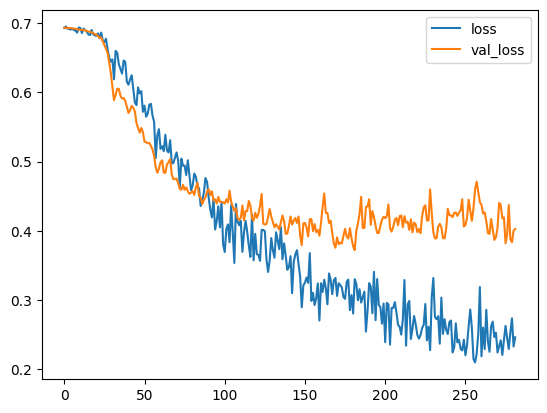

In [856]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

<AxesSubplot:>

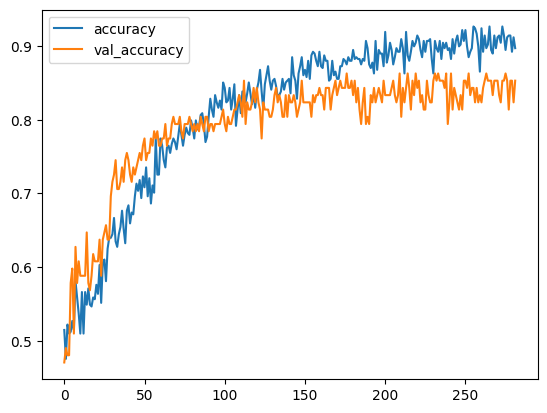

In [857]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot()

In [858]:
predictions = model.predict_classes(X_test)

In [859]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [860]:
print(classification_report(predictions, y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.94      0.79      0.86        58

    accuracy                           0.85       102
   macro avg       0.86      0.86      0.85       102
weighted avg       0.87      0.85      0.85       102



In [917]:
xsm.shape

(510, 22)

### Auto Encoders

In [1056]:
encoder = Sequential()
encoder.add(Dense(units=15, input_shape = [22], activation = "relu"))

In [1057]:
decoder = Sequential()
decoder.add(Dense(units=22, input_shape = [15], activation = "relu"))

In [1058]:
autoEncoder = Sequential([encoder, decoder])

In [1059]:
autoEncoder.compile(loss = "binary_crossentropy", optimizer= "adam")

In [1060]:
scalar = MinMaxScaler()

In [1061]:
scaledData = scalar.fit_transform(df.drop(target,axis=1))

In [1062]:
autoEncoder.fit(scaledData, scaledData, epochs = 3000)

Train on 317 samples
Epoch 1/3000
317/317 [==============================] - 0s 1ms/sample - loss: 3.5589
Epoch 2/3000
317/317 [==============================] - 0s 49us/sample - loss: 3.4262
Epoch 3/3000
317/317 [==============================] - 0s 49us/sample - loss: 3.3056
Epoch 4/3000
317/317 [==============================] - 0s 46us/sample - loss: 3.1937
Epoch 5/3000
317/317 [==============================] - 0s 46us/sample - loss: 3.0837
Epoch 6/3000
317/317 [==============================] - 0s 45us/sample - loss: 2.9631
Epoch 7/3000
317/317 [==============================] - 0s 47us/sample - loss: 2.8549
Epoch 8/3000
317/317 [==============================] - 0s 47us/sample - loss: 2.7507
Epoch 9/3000
317/317 [==============================] - 0s 48us/sample - loss: 2.6863
Epoch 10/3000
317/317 [==============================] - 0s 48us/sample - loss: 2.6434
Epoch 11/3000
317/317 [==============================] - 0s 47us/sample - loss: 2.5820
Epoch 12/3000
317/317 [=========

317/317 [==============================] - 0s 51us/sample - loss: 0.4926
Epoch 96/3000
317/317 [==============================] - 0s 51us/sample - loss: 0.4917
Epoch 97/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.4907
Epoch 98/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.4898
Epoch 99/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.4889
Epoch 100/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.4880
Epoch 101/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.4872
Epoch 102/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.4863
Epoch 103/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.4855
Epoch 104/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.4846
Epoch 105/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.4838
Epoch 106/3000
317/317 [===========================

317/317 [==============================] - 0s 45us/sample - loss: 0.4067
Epoch 189/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.4055
Epoch 190/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.4039
Epoch 191/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.4022
Epoch 192/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.4005
Epoch 193/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3989
Epoch 194/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3974
Epoch 195/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3962
Epoch 196/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3950
Epoch 197/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3940
Epoch 198/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3929
Epoch 199/3000
317/317 [=======================

317/317 [==============================] - 0s 43us/sample - loss: 0.3513
Epoch 282/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3511
Epoch 283/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3509
Epoch 284/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3507
Epoch 285/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3505
Epoch 286/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3503
Epoch 287/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3501
Epoch 288/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3499
Epoch 289/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3497
Epoch 290/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3495
Epoch 291/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3494
Epoch 292/3000
317/317 [=======================

317/317 [==============================] - 0s 51us/sample - loss: 0.3380
Epoch 375/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3379
Epoch 376/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3378
Epoch 377/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3377
Epoch 378/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3376
Epoch 379/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3375
Epoch 380/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3374
Epoch 381/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3373
Epoch 382/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3372
Epoch 383/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3370
Epoch 384/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3369
Epoch 385/3000
317/317 [=======================

317/317 [==============================] - 0s 51us/sample - loss: 0.3287
Epoch 468/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3286
Epoch 469/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3285
Epoch 470/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3284
Epoch 471/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3284
Epoch 472/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3283
Epoch 473/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3281
Epoch 474/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3281
Epoch 475/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3286
Epoch 476/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3303
Epoch 477/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3291
Epoch 478/3000
317/317 [=======================

317/317 [==============================] - 0s 46us/sample - loss: 0.3209
Epoch 561/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3209
Epoch 562/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3208
Epoch 563/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3207
Epoch 564/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3206
Epoch 565/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3205
Epoch 566/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3205
Epoch 567/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3204
Epoch 568/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3203
Epoch 569/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3202
Epoch 570/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3202
Epoch 571/3000
317/317 [=======================

317/317 [==============================] - 0s 47us/sample - loss: 0.3150
Epoch 654/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3149
Epoch 655/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3149
Epoch 656/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3149
Epoch 657/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3148
Epoch 658/3000
317/317 [==============================] - 0s 52us/sample - loss: 0.3152
Epoch 659/3000
317/317 [==============================] - 0s 51us/sample - loss: 0.3149
Epoch 660/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3147
Epoch 661/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3146
Epoch 662/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3145
Epoch 663/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3145
Epoch 664/3000
317/317 [=======================

317/317 [==============================] - 0s 46us/sample - loss: 0.3111
Epoch 747/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3110
Epoch 748/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3110
Epoch 749/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3110
Epoch 750/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3109
Epoch 751/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3109
Epoch 752/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3108
Epoch 753/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3108
Epoch 754/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3107
Epoch 755/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3107
Epoch 756/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3106
Epoch 757/3000
317/317 [=======================

317/317 [==============================] - 0s 45us/sample - loss: 0.3084
Epoch 840/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3084
Epoch 841/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3084
Epoch 842/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3084
Epoch 843/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3083
Epoch 844/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3083
Epoch 845/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3083
Epoch 846/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3083
Epoch 847/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3083
Epoch 848/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3082
Epoch 849/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3082
Epoch 850/3000
317/317 [=======================

317/317 [==============================] - 0s 48us/sample - loss: 0.3072
Epoch 933/3000
317/317 [==============================] - 0s 51us/sample - loss: 0.3072
Epoch 934/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3072
Epoch 935/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3072
Epoch 936/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3072
Epoch 937/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3071
Epoch 938/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3071
Epoch 939/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3071
Epoch 940/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3071
Epoch 941/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3071
Epoch 942/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3071
Epoch 943/3000
317/317 [=======================

Epoch 1025/3000
317/317 [==============================] - 0s 64us/sample - loss: 0.3060
Epoch 1026/3000
317/317 [==============================] - 0s 55us/sample - loss: 0.3060
Epoch 1027/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3061
Epoch 1028/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3061
Epoch 1029/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3060
Epoch 1030/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3060
Epoch 1031/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3060
Epoch 1032/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3060
Epoch 1033/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3060
Epoch 1034/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3060
Epoch 1035/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3060
Epoch 1036/3000
317/3

317/317 [==============================] - 0s 49us/sample - loss: 0.3372
Epoch 1118/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3277
Epoch 1119/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3202
Epoch 1120/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3169
Epoch 1121/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3152
Epoch 1122/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3219
Epoch 1123/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3308
Epoch 1124/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3151
Epoch 1125/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3150
Epoch 1126/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3108
Epoch 1127/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3101
Epoch 1128/3000
317/317 [============

317/317 [==============================] - 0s 43us/sample - loss: 0.3054
Epoch 1210/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3054
Epoch 1211/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3054
Epoch 1212/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3054
Epoch 1213/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3054
Epoch 1214/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3054
Epoch 1215/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3054
Epoch 1216/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3054
Epoch 1217/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3054
Epoch 1218/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3054
Epoch 1219/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3054
Epoch 1220/3000
317/317 [============

317/317 [==============================] - 0s 44us/sample - loss: 0.3048
Epoch 1302/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3048
Epoch 1303/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3048
Epoch 1304/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3048
Epoch 1305/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3048
Epoch 1306/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3048
Epoch 1307/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3048
Epoch 1308/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3048
Epoch 1309/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3048
Epoch 1310/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3048
Epoch 1311/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3048
Epoch 1312/3000
317/317 [============

317/317 [==============================] - 0s 49us/sample - loss: 0.3046
Epoch 1394/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3046
Epoch 1395/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3047
Epoch 1396/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3046
Epoch 1397/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3046
Epoch 1398/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3046
Epoch 1399/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3046
Epoch 1400/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3046
Epoch 1401/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3046
Epoch 1402/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3046
Epoch 1403/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3046
Epoch 1404/3000
317/317 [============

317/317 [==============================] - 0s 49us/sample - loss: 0.3045
Epoch 1486/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3045
Epoch 1487/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3046
Epoch 1488/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3045
Epoch 1489/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3045
Epoch 1490/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3045
Epoch 1491/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3045
Epoch 1492/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3045
Epoch 1493/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3045
Epoch 1494/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3045
Epoch 1495/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3045
Epoch 1496/3000
317/317 [============

317/317 [==============================] - 0s 44us/sample - loss: 0.3044
Epoch 1578/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3044
Epoch 1579/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3044
Epoch 1580/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3044
Epoch 1581/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3044
Epoch 1582/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3044
Epoch 1583/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3044
Epoch 1584/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3044
Epoch 1585/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3044
Epoch 1586/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3044
Epoch 1587/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3044
Epoch 1588/3000
317/317 [============

317/317 [==============================] - 0s 47us/sample - loss: 0.3043
Epoch 1670/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3043
Epoch 1671/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3043
Epoch 1672/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3043
Epoch 1673/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3043
Epoch 1674/3000
317/317 [==============================] - 0s 52us/sample - loss: 0.3043
Epoch 1675/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3043
Epoch 1676/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3044
Epoch 1677/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3043
Epoch 1678/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3043
Epoch 1679/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3043
Epoch 1680/3000
317/317 [============

317/317 [==============================] - 0s 43us/sample - loss: 0.3042
Epoch 1762/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3042
Epoch 1763/3000
317/317 [==============================] - 0s 40us/sample - loss: 0.3042
Epoch 1764/3000
317/317 [==============================] - 0s 42us/sample - loss: 0.3042
Epoch 1765/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3042
Epoch 1766/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3042
Epoch 1767/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3042
Epoch 1768/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3042
Epoch 1769/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3042
Epoch 1770/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3042
Epoch 1771/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3042
Epoch 1772/3000
317/317 [============

317/317 [==============================] - 0s 48us/sample - loss: 0.3040
Epoch 1854/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3040
Epoch 1855/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3041
Epoch 1856/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3041
Epoch 1857/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3041
Epoch 1858/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3040
Epoch 1859/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3040
Epoch 1860/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3040
Epoch 1861/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3040
Epoch 1862/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3041
Epoch 1863/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3041
Epoch 1864/3000
317/317 [============

317/317 [==============================] - 0s 46us/sample - loss: 0.3038
Epoch 1946/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3038
Epoch 1947/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3038
Epoch 1948/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3039
Epoch 1949/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3038
Epoch 1950/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3038
Epoch 1951/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3038
Epoch 1952/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3038
Epoch 1953/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3038
Epoch 1954/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3038
Epoch 1955/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3038
Epoch 1956/3000
317/317 [============

317/317 [==============================] - 0s 47us/sample - loss: 0.3038
Epoch 2038/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3038
Epoch 2039/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3037
Epoch 2040/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3037
Epoch 2041/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3038
Epoch 2042/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3037
Epoch 2043/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3037
Epoch 2044/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3037
Epoch 2045/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3037
Epoch 2046/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3037
Epoch 2047/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3037
Epoch 2048/3000
317/317 [============

317/317 [==============================] - 0s 47us/sample - loss: 0.3037
Epoch 2130/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3037
Epoch 2131/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3037
Epoch 2132/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3037
Epoch 2133/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3037
Epoch 2134/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3037
Epoch 2135/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3036
Epoch 2136/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3036
Epoch 2137/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3036
Epoch 2138/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3037
Epoch 2139/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3036
Epoch 2140/3000
317/317 [============

317/317 [==============================] - 0s 49us/sample - loss: 0.3036
Epoch 2222/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3036
Epoch 2223/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3035
Epoch 2224/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3036
Epoch 2225/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3035
Epoch 2226/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3036
Epoch 2227/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3035
Epoch 2228/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3035
Epoch 2229/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3035
Epoch 2230/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3035
Epoch 2231/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3036
Epoch 2232/3000
317/317 [============

317/317 [==============================] - 0s 43us/sample - loss: 0.3035
Epoch 2314/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3035
Epoch 2315/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3035
Epoch 2316/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3035
Epoch 2317/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3035
Epoch 2318/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3035
Epoch 2319/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3035
Epoch 2320/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3035
Epoch 2321/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3035
Epoch 2322/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3035
Epoch 2323/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3035
Epoch 2324/3000
317/317 [============

317/317 [==============================] - 0s 47us/sample - loss: 0.3035
Epoch 2406/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3035
Epoch 2407/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3034
Epoch 2408/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3034
Epoch 2409/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2410/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2411/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3034
Epoch 2412/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2413/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3034
Epoch 2414/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2415/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3036
Epoch 2416/3000
317/317 [============

317/317 [==============================] - 0s 47us/sample - loss: 0.3034
Epoch 2498/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3034
Epoch 2499/3000
317/317 [==============================] - 0s 43us/sample - loss: 0.3034
Epoch 2500/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3034
Epoch 2501/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3034
Epoch 2502/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2503/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2504/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2505/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3034
Epoch 2506/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3034
Epoch 2507/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3034
Epoch 2508/3000
317/317 [============

317/317 [==============================] - 0s 43us/sample - loss: 0.3033
Epoch 2590/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3033
Epoch 2591/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3033
Epoch 2592/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3033
Epoch 2593/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3033
Epoch 2594/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3033
Epoch 2595/3000
317/317 [==============================] - 0s 44us/sample - loss: 0.3033
Epoch 2596/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3033
Epoch 2597/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3034
Epoch 2598/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3034
Epoch 2599/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3033
Epoch 2600/3000
317/317 [============

317/317 [==============================] - 0s 51us/sample - loss: 0.3033
Epoch 2682/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3033
Epoch 2683/3000
317/317 [==============================] - 0s 51us/sample - loss: 0.3033
Epoch 2684/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3033
Epoch 2685/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3033
Epoch 2686/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3033
Epoch 2687/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3033
Epoch 2688/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3033
Epoch 2689/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3033
Epoch 2690/3000
317/317 [==============================] - 0s 51us/sample - loss: 0.3033
Epoch 2691/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3033
Epoch 2692/3000
317/317 [============

317/317 [==============================] - 0s 51us/sample - loss: 0.3033
Epoch 2774/3000
317/317 [==============================] - 0s 50us/sample - loss: 0.3032
Epoch 2775/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2776/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3033
Epoch 2777/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3032
Epoch 2778/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2779/3000
317/317 [==============================] - 0s 51us/sample - loss: 0.3032
Epoch 2780/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3032
Epoch 2781/3000
317/317 [==============================] - 0s 68us/sample - loss: 0.3032
Epoch 2782/3000
317/317 [==============================] - 0s 59us/sample - loss: 0.3032
Epoch 2783/3000
317/317 [==============================] - 0s 53us/sample - loss: 0.3032
Epoch 2784/3000
317/317 [============

317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2866/3000
317/317 [==============================] - 0s 49us/sample - loss: 0.3032
Epoch 2867/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2868/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2869/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3032
Epoch 2870/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3032
Epoch 2871/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3032
Epoch 2872/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3032
Epoch 2873/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3032
Epoch 2874/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2875/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3032
Epoch 2876/3000
317/317 [============

317/317 [==============================] - 0s 48us/sample - loss: 0.3032
Epoch 2958/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3032
Epoch 2959/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3032
Epoch 2960/3000
317/317 [==============================] - 0s 42us/sample - loss: 0.3032
Epoch 2961/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3032
Epoch 2962/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2963/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3032
Epoch 2964/3000
317/317 [==============================] - 0s 46us/sample - loss: 0.3032
Epoch 2965/3000
317/317 [==============================] - 0s 45us/sample - loss: 0.3032
Epoch 2966/3000
317/317 [==============================] - 0s 48us/sample - loss: 0.3032
Epoch 2967/3000
317/317 [==============================] - 0s 47us/sample - loss: 0.3032
Epoch 2968/3000
317/317 [============

<AxesSubplot:>

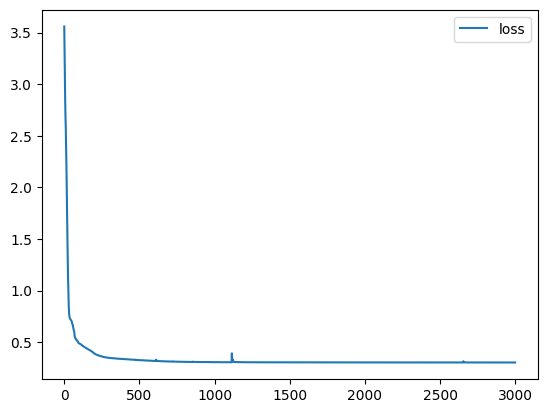

In [1063]:
pd.DataFrame(autoEncoder.history.history).plot()

In [1064]:
encoderPred = encoder.predict(scaledData)

In [1065]:
encoderPred.shape

(317, 15)

<AxesSubplot:>

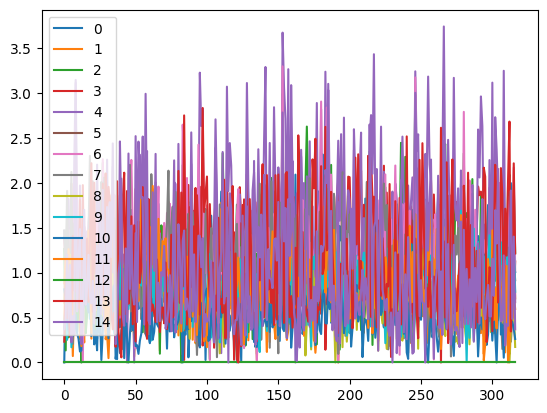

In [1066]:
pd.DataFrame(encoderPred).plot()

In [1067]:
ddf = pd.DataFrame(encoderPred)

In [1068]:
ddf

0         1         2         3         4    5         6   \
0   -0.000000  0.483464  1.264463  1.395154  1.464407 -0.0  0.685638   
1    0.989675  1.019356  0.134306  1.082068  1.062951 -0.0  1.285520   
2    0.628953  1.284017  1.672999  1.162018  0.439269 -0.0  1.518613   
3    0.512673  0.278869  0.282230  1.464522  1.821915 -0.0  0.468053   
4    1.137567  1.479878  0.771787  1.140741  0.436887 -0.0  1.470248   
..        ...       ...       ...       ...       ...  ...       ...   
312  0.691991  0.477726  2.090094  0.094122  1.799590 -0.0  1.847704   
313  1.996647  0.723929  0.710540  1.687801  1.354037 -0.0  0.631994   
314  1.002938  1.039916  0.831355  1.411175  1.027382 -0.0  1.125709   
315  1.065382  1.372936  1.977711  0.784261  1.791738 -0.0  2.170074   
316  1.007724  0.713585  1.220565  1.124066  0.671620 -0.0  1.018585   

           7         8         9         10        11   12        13        14  
0    1.470372  0.662672  0.385248  0.813943  0.881198 -0.0  0.231769  0.369621  
1    0.978317  1.086215  0.685266  0.717844  1.150145 -0.0  0.901304  0.490519  
2    1.909082  0.368934  0.252364  0.509609  0.955870 -0.0  0.493883  1.196981  
3    0.894331  1.038098  0.761279  0.353089  1.261593 -0.0  0.619813  0.462276  
4    1.081266  1.200863  1.010700  0.537963  1.052308 -0.0  0.290664  1.086844  
..        ...       ...       ...       ...       ...  ...       ...       ...  
312  0.872035 -0.000000  0.873633  0.783433  0.168115 -0.0  2.681753  1.404970  
313  0.231385  0.369644  0.909901  0.453380  1.160988 -0.0  0.345336  1.913666  
314  0.485000  0.656001  1.242850  0.452160  0.495176 -0.0  0.990414  0.485266  
315  1.148507  0.598287  1.332370  0.376570  0.774306 -0.0  2.216778  1.401226  
316  0.916548  0.172691  0.787586  0.261713  0.596423 -0.0  1.212922  0.368582  

[317 rows x 15 columns]

In [1069]:
X = encoderPred
y = df[target].values

In [1070]:
xsm, ysm = SMOTE().fit_resample(X, y)

In [1071]:
X_train, X_test, y_train, y_test = train_test_split(xsm, ysm, test_size=0.20, random_state=42)

In [1072]:
model = Sequential()
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=22, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=12, activation="relu"))
model.add(Dense(units=20, activation="relu"))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [1073]:
stop = EarlyStopping(patience=100)

In [1074]:
model.fit(X_train, y_train, epochs =1000, validation_data = (X_test, y_test), callbacks = [stop])

Train on 408 samples, validate on 102 samples
Epoch 1/1000
408/408 [==============================] - 2s 4ms/sample - loss: 0.7181 - accuracy: 0.5123 - val_loss: 0.6986 - val_accuracy: 0.4804
Epoch 2/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.6977 - accuracy: 0.5049 - val_loss: 0.6918 - val_accuracy: 0.4608
Epoch 3/1000
408/408 [==============================] - 0s 146us/sample - loss: 0.6926 - accuracy: 0.5466 - val_loss: 0.6904 - val_accuracy: 0.5098
Epoch 4/1000
408/408 [==============================] - 0s 149us/sample - loss: 0.6961 - accuracy: 0.4902 - val_loss: 0.6903 - val_accuracy: 0.5098
Epoch 5/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.6964 - accuracy: 0.4828 - val_loss: 0.6903 - val_accuracy: 0.5098
Epoch 6/1000
408/408 [==============================] - 0s 147us/sample - loss: 0.6973 - accuracy: 0.4853 - val_loss: 0.6901 - val_accuracy: 0.5196
Epoch 7/1000
408/408 [==============================] - 0s 148us/sam

Epoch 56/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.6818 - accuracy: 0.5466 - val_loss: 0.6772 - val_accuracy: 0.5196
Epoch 57/1000
408/408 [==============================] - 0s 146us/sample - loss: 0.6837 - accuracy: 0.5319 - val_loss: 0.6766 - val_accuracy: 0.5098
Epoch 58/1000
408/408 [==============================] - 0s 150us/sample - loss: 0.6854 - accuracy: 0.5564 - val_loss: 0.6762 - val_accuracy: 0.5490
Epoch 59/1000
408/408 [==============================] - 0s 146us/sample - loss: 0.6789 - accuracy: 0.5858 - val_loss: 0.6792 - val_accuracy: 0.5588
Epoch 60/1000
408/408 [==============================] - 0s 145us/sample - loss: 0.6829 - accuracy: 0.5343 - val_loss: 0.6762 - val_accuracy: 0.5686
Epoch 61/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.6801 - accuracy: 0.5539 - val_loss: 0.6757 - val_accuracy: 0.5588
Epoch 62/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.6793 - accuracy: 0.5490

Epoch 111/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.6033 - accuracy: 0.6618 - val_loss: 0.5751 - val_accuracy: 0.7157
Epoch 112/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.6000 - accuracy: 0.6373 - val_loss: 0.5690 - val_accuracy: 0.7255
Epoch 113/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.6075 - accuracy: 0.6520 - val_loss: 0.5719 - val_accuracy: 0.6373
Epoch 114/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.5969 - accuracy: 0.6716 - val_loss: 0.5638 - val_accuracy: 0.7157
Epoch 115/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.5988 - accuracy: 0.6593 - val_loss: 0.5681 - val_accuracy: 0.7059
Epoch 116/1000
408/408 [==============================] - 0s 144us/sample - loss: 0.5871 - accuracy: 0.6520 - val_loss: 0.5737 - val_accuracy: 0.7059
Epoch 117/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.5892 - accuracy:

408/408 [==============================] - 0s 140us/sample - loss: 0.5264 - accuracy: 0.7206 - val_loss: 0.5346 - val_accuracy: 0.7157
Epoch 166/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.5437 - accuracy: 0.7059 - val_loss: 0.5202 - val_accuracy: 0.7353
Epoch 167/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.5525 - accuracy: 0.6863 - val_loss: 0.5324 - val_accuracy: 0.7255
Epoch 168/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.5659 - accuracy: 0.6789 - val_loss: 0.5233 - val_accuracy: 0.7451
Epoch 169/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.5390 - accuracy: 0.7230 - val_loss: 0.5274 - val_accuracy: 0.7451
Epoch 170/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.5282 - accuracy: 0.7426 - val_loss: 0.5251 - val_accuracy: 0.7451
Epoch 171/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.5192 - accuracy: 0.6985 - val_l

Epoch 220/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.5093 - accuracy: 0.7353 - val_loss: 0.5048 - val_accuracy: 0.8039
Epoch 221/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.5176 - accuracy: 0.7230 - val_loss: 0.5023 - val_accuracy: 0.8039
Epoch 222/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.4937 - accuracy: 0.7328 - val_loss: 0.5032 - val_accuracy: 0.7843
Epoch 223/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.5093 - accuracy: 0.7304 - val_loss: 0.4977 - val_accuracy: 0.7745
Epoch 224/1000
408/408 [==============================] - 0s 145us/sample - loss: 0.5120 - accuracy: 0.7500 - val_loss: 0.5171 - val_accuracy: 0.7549
Epoch 225/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.5081 - accuracy: 0.7500 - val_loss: 0.5138 - val_accuracy: 0.7745
Epoch 226/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.5530 - accuracy:

408/408 [==============================] - 0s 142us/sample - loss: 0.5108 - accuracy: 0.7230 - val_loss: 0.4946 - val_accuracy: 0.7647
Epoch 275/1000
408/408 [==============================] - 0s 144us/sample - loss: 0.4959 - accuracy: 0.7647 - val_loss: 0.4893 - val_accuracy: 0.7843
Epoch 276/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.4914 - accuracy: 0.7623 - val_loss: 0.4980 - val_accuracy: 0.7549
Epoch 277/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.5109 - accuracy: 0.7500 - val_loss: 0.4987 - val_accuracy: 0.7745
Epoch 278/1000
408/408 [==============================] - 0s 145us/sample - loss: 0.5124 - accuracy: 0.7255 - val_loss: 0.5032 - val_accuracy: 0.7745
Epoch 279/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.4613 - accuracy: 0.7770 - val_loss: 0.4914 - val_accuracy: 0.7647
Epoch 280/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.4806 - accuracy: 0.7623 - val_l

Epoch 329/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.4466 - accuracy: 0.7721 - val_loss: 0.4688 - val_accuracy: 0.7843
Epoch 330/1000
408/408 [==============================] - 0s 137us/sample - loss: 0.4758 - accuracy: 0.7819 - val_loss: 0.4680 - val_accuracy: 0.7941
Epoch 331/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.4959 - accuracy: 0.7279 - val_loss: 0.4711 - val_accuracy: 0.7843
Epoch 332/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.4940 - accuracy: 0.7623 - val_loss: 0.5059 - val_accuracy: 0.7549
Epoch 333/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.4492 - accuracy: 0.7892 - val_loss: 0.4984 - val_accuracy: 0.7745
Epoch 334/1000
408/408 [==============================] - 0s 137us/sample - loss: 0.4667 - accuracy: 0.7770 - val_loss: 0.4673 - val_accuracy: 0.7843
Epoch 335/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.4728 - accuracy:

408/408 [==============================] - 0s 146us/sample - loss: 0.4564 - accuracy: 0.7672 - val_loss: 0.4569 - val_accuracy: 0.7941
Epoch 384/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.4349 - accuracy: 0.7941 - val_loss: 0.4633 - val_accuracy: 0.7941
Epoch 385/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.4410 - accuracy: 0.7843 - val_loss: 0.4809 - val_accuracy: 0.7745
Epoch 386/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.4357 - accuracy: 0.7819 - val_loss: 0.4548 - val_accuracy: 0.7941
Epoch 387/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.4240 - accuracy: 0.7794 - val_loss: 0.4657 - val_accuracy: 0.7843
Epoch 388/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.4793 - accuracy: 0.7672 - val_loss: 0.4883 - val_accuracy: 0.7451
Epoch 389/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.4492 - accuracy: 0.7843 - val_l

Epoch 438/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.4376 - accuracy: 0.8064 - val_loss: 0.4711 - val_accuracy: 0.7843
Epoch 439/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.3696 - accuracy: 0.8260 - val_loss: 0.4600 - val_accuracy: 0.8039
Epoch 440/1000
408/408 [==============================] - 0s 137us/sample - loss: 0.3910 - accuracy: 0.8113 - val_loss: 0.4443 - val_accuracy: 0.8235
Epoch 441/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.4021 - accuracy: 0.8186 - val_loss: 0.4679 - val_accuracy: 0.7941
Epoch 442/1000
408/408 [==============================] - 0s 145us/sample - loss: 0.3998 - accuracy: 0.8235 - val_loss: 0.4727 - val_accuracy: 0.7941
Epoch 443/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.3949 - accuracy: 0.8137 - val_loss: 0.4805 - val_accuracy: 0.8039
Epoch 444/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.4244 - accuracy:

408/408 [==============================] - 0s 141us/sample - loss: 0.4322 - accuracy: 0.7819 - val_loss: 0.4507 - val_accuracy: 0.8039
Epoch 493/1000
408/408 [==============================] - 0s 148us/sample - loss: 0.4314 - accuracy: 0.7819 - val_loss: 0.4299 - val_accuracy: 0.8137
Epoch 494/1000
408/408 [==============================] - 0s 144us/sample - loss: 0.3942 - accuracy: 0.8358 - val_loss: 0.4547 - val_accuracy: 0.8137
Epoch 495/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.3721 - accuracy: 0.8480 - val_loss: 0.4686 - val_accuracy: 0.7941
Epoch 496/1000
408/408 [==============================] - 0s 137us/sample - loss: 0.4102 - accuracy: 0.8211 - val_loss: 0.4402 - val_accuracy: 0.8137
Epoch 497/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.3873 - accuracy: 0.8333 - val_loss: 0.4404 - val_accuracy: 0.8333
Epoch 498/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.4032 - accuracy: 0.8162 - val_l

Epoch 547/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.4011 - accuracy: 0.8260 - val_loss: 0.4842 - val_accuracy: 0.7843
Epoch 548/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.3939 - accuracy: 0.8235 - val_loss: 0.4767 - val_accuracy: 0.7843
Epoch 549/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.3791 - accuracy: 0.8407 - val_loss: 0.4605 - val_accuracy: 0.7941
Epoch 550/1000
408/408 [==============================] - 0s 138us/sample - loss: 0.3740 - accuracy: 0.8333 - val_loss: 0.4476 - val_accuracy: 0.7843
Epoch 551/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.4096 - accuracy: 0.8211 - val_loss: 0.4547 - val_accuracy: 0.8039
Epoch 552/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.3551 - accuracy: 0.8578 - val_loss: 0.4492 - val_accuracy: 0.7941
Epoch 553/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.4108 - accuracy:

408/408 [==============================] - 0s 138us/sample - loss: 0.3911 - accuracy: 0.8407 - val_loss: 0.4618 - val_accuracy: 0.7843
Epoch 602/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.3345 - accuracy: 0.8652 - val_loss: 0.4569 - val_accuracy: 0.7941
Epoch 603/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.3536 - accuracy: 0.8407 - val_loss: 0.4489 - val_accuracy: 0.7941
Epoch 604/1000
408/408 [==============================] - 0s 141us/sample - loss: 0.3467 - accuracy: 0.8554 - val_loss: 0.4453 - val_accuracy: 0.8039
Epoch 605/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.3380 - accuracy: 0.8676 - val_loss: 0.4335 - val_accuracy: 0.8039
Epoch 606/1000
408/408 [==============================] - 0s 140us/sample - loss: 0.3659 - accuracy: 0.8505 - val_loss: 0.4427 - val_accuracy: 0.8039
Epoch 607/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.3868 - accuracy: 0.8333 - val_l

Epoch 656/1000
408/408 [==============================] - 0s 142us/sample - loss: 0.3538 - accuracy: 0.8382 - val_loss: 0.4357 - val_accuracy: 0.8137
Epoch 657/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.3385 - accuracy: 0.8554 - val_loss: 0.4258 - val_accuracy: 0.7941
Epoch 658/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.3335 - accuracy: 0.8505 - val_loss: 0.4708 - val_accuracy: 0.7941
Epoch 659/1000
408/408 [==============================] - 0s 139us/sample - loss: 0.3256 - accuracy: 0.8824 - val_loss: 0.4753 - val_accuracy: 0.7843
Epoch 660/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.3513 - accuracy: 0.8382 - val_loss: 0.4405 - val_accuracy: 0.8039
Epoch 661/1000
408/408 [==============================] - 0s 143us/sample - loss: 0.3716 - accuracy: 0.8162 - val_loss: 0.4409 - val_accuracy: 0.7843
Epoch 662/1000
408/408 [==============================] - 0s 144us/sample - loss: 0.3551 - accuracy:

<AxesSubplot:>

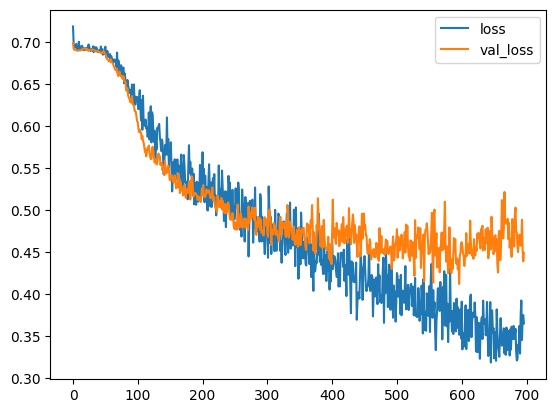

In [1075]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

<AxesSubplot:>

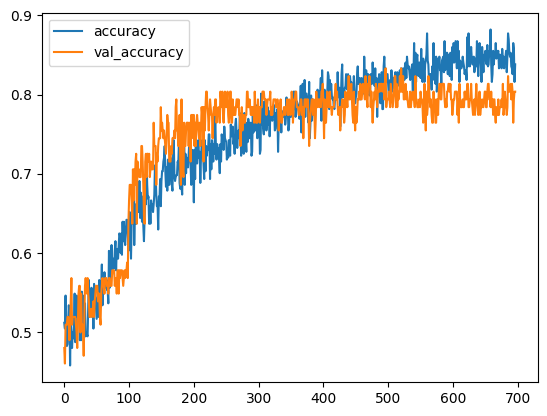

In [1076]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot()

In [1079]:
autoModelPred = model.predict_classes(X_test)

In [1081]:
print(classification_report(autoModelPred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        43
           1       0.90      0.75      0.81        59

    accuracy                           0.80       102
   macro avg       0.81      0.81      0.80       102
weighted avg       0.82      0.80      0.81       102



## RANDOM FOREST

In [1082]:
from sklearn.ensemble import RandomForestClassifier

In [1083]:
X = df.drop(target, axis=1).values
y = df[target].values

In [1085]:
xsm, ysm = SMOTE().fit_resample(X, y)

In [1086]:
X_train, X_test, y_train, y_test = train_test_split(xsm, ysm, test_size=0.20, random_state=42)

In [1087]:
model = RandomForestClassifier()

In [1088]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [1089]:
predictions = model.predict(X_test)

In [1090]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        57
           1       0.88      0.96      0.91        45

    accuracy                           0.92       102
   macro avg       0.92      0.93      0.92       102
weighted avg       0.92      0.92      0.92       102



In [1107]:
from random import randint
random_index = randint(0, len(df))
randomPatient = df.drop(target, axis=1).iloc[random_index]

In [1108]:
randomPatient.shape

(22,)

In [1109]:
xsm.shape

(510, 22)

In [1110]:
randomPatient = randomPatient.values.reshape(1,22)

In [1111]:
model.predict(randomPatient)

array([0], dtype=uint8)

## True Value

In [1112]:
df.iloc[random_index][target]

0.0

#### from sklearn.metrics import accuracy_score

In [1098]:
print(accuracy_score(predictions, y_test))

0.9215686274509803


In [1099]:
import scikitplot as skplt

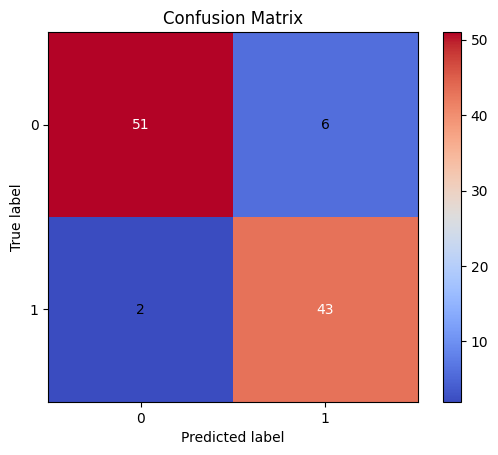

In [1100]:
skplt.metrics.plot_confusion_matrix(predictions, y_test,
                                    normalize=False,
                                    title="Confusion Matrix",
                                    cmap="coolwarm",
                                    );